# Get Data

In [1]:
import os
import zipfile
import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
IRIS_PATH = os.path.join("datasets", "iris")
IRIS_URL = DOWNLOAD_ROOT 

def extract_iris_data(iris_url=IRIS_URL,iris_path=IRIS_PATH):
    if not os.path.isdir(iris_path):
        os.makedirs(iris_path)
    irisdata_path = os.path.join(iris_path,"iris.data")
    urllib.request.urlretrieve(iris_url, irisdata_path)


In [2]:
extract_iris_data()

## Data Manipulation and analysis

In [3]:
import pandas as pd
def load_iris_train_data(iris_path=IRIS_PATH):
    csv_path = os.path.join(iris_path, "iris.data")
    return pd.read_csv(csv_path,names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])

In [4]:
datasets=load_iris_train_data()
datasets.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(datasets[['Class']])
datasets['Class'] = cat_encoded
datasets.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
labels = ordinal_encoder.categories_
labels = list(labels)
print(labels)

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]


Text(0.5, 1.0, 'scatter')

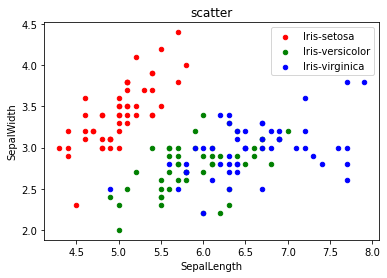

In [7]:
import matplotlib.pyplot as plt
ax = datasets[datasets.Class==0].plot.scatter(x='SepalLength', y='SepalWidth',
                                                    color='red', label='Iris-setosa')
datasets[datasets.Class==1].plot.scatter(x='SepalLength', y='SepalWidth',
                                                color='green', label='Iris-versicolor', ax=ax)
datasets[datasets.Class==2].plot.scatter(x='SepalLength', y='SepalWidth',
                                                color='blue', label='Iris-virginica', ax=ax)
ax.set_title("scatter")

The above scatter plot shows three classes, i.e. 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

## Divide dataset into Train/Test

In [8]:
from sklearn.model_selection import train_test_split
X=datasets[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y=datasets['Class']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=42)

## Prepare data for ML

### Standard scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr = scaler.fit_transform(X_train)
X_test_tr = scaler.fit_transform(X_test)
X_train_tr

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

## Training the model

### SVC with linear kernel

In [10]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_tr, y_train)
y_pred = svc.predict(X_test_tr)
print("C for trained model: ",svc.C)
print("gamma for trained model: ",svc.gamma)

C for trained model:  1.0
gamma for trained model:  scale


### RMSE for SVC linear kernel

In [11]:
from sklearn.metrics import mean_squared_error
print("Root mean squared error: ",mean_squared_error(y_test, y_pred, squared=False))

Root mean squared error:  0.31622776601683794


### Classification report

In [12]:
from sklearn.metrics import classification_report
print("Classification report for SVC linear kernel")
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

Classification report for SVC linear kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



### SVC with rbf kernel

In [13]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_tr, y_train)
y_pred_rbf = svc_rbf.predict(X_test_tr)
print("C for trained model: ",svc_rbf.C)
print("gamma for trained model: ",svc_rbf.gamma)

C for trained model:  1.0
gamma for trained model:  scale


### RMSE for SVC rbf kernel

In [14]:
print("Root mean squared error: ",mean_squared_error(y_test, y_pred_rbf, squared=False))

Root mean squared error:  0.18257418583505536


### Classification report

In [15]:
from sklearn.metrics import classification_report
print("Classification report for SVC linear kernel")
print(classification_report(y_test, y_pred_rbf, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

Classification report for SVC linear kernel
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Tuning the SVC rbf kernel model

In [16]:
from sklearn.model_selection import GridSearchCV
parameters_svc = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.01, 0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(svc_rbf, parameters_svc)
clf.fit(X_train_tr, y_train)
print("Best parameters for C and gamma")
clf.best_estimator_

Best parameters for C and gamma


SVC(C=100, gamma=0.01)

## Accuracy on test set with tuned SVC rbf kernel

In [17]:
from sklearn.metrics import accuracy_score
svc_tuned = clf.best_estimator_
y_pred_svc_tuned = svc.predict(X_test_tr)
print("RMSE: ",mean_squared_error(y_test, y_pred_svc_tuned, squared=False))
print(classification_report(y_test, y_pred_svc_tuned, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

print("Acurracy: ",accuracy_score(y_test, y_pred_svc_tuned) * 100)

RMSE:  0.31622776601683794
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Acurracy:  90.0


## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_tr, y_train)
y_pred_knn = svc.predict(X_test_tr)
print("RMSE: ",mean_squared_error(y_test, y_pred_knn, squared=False))
print("Classification report: ",classification_report(y_test, y_pred_knn, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

RMSE:  0.31622776601683794
Classification report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Accuracy:  0.9


### Tuning KNN

In [19]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_neighbors': range(1,11)}
clf_randomCV = RandomizedSearchCV(knn, parameters, random_state=0)
search = clf_randomCV.fit(X_train_tr, y_train)
print("Best parameters: ", search.best_params_)

Best parameters:  {'n_neighbors': 3}


## Accuracy on test set with tuned KNN

In [20]:
knn_tuned = search.best_estimator_
y_pred_knn_tuned = knn_tuned.predict(X_test_tr)
print("RMSE: ", mean_squared_error(y_test, y_pred_knn_tuned, squared=False))
print("Classification report: ",classification_report(y_test, y_pred_svc_tuned, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print("Accuracy: ",accuracy_score(y_test, y_pred_knn_tuned) * 100)

RMSE:  0.18257418583505536
Classification report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Accuracy:  96.66666666666667
